## Les 5 classes ayant les pires scores f1 pour chaque modèle

Now processing: ..\models\cnn_image_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


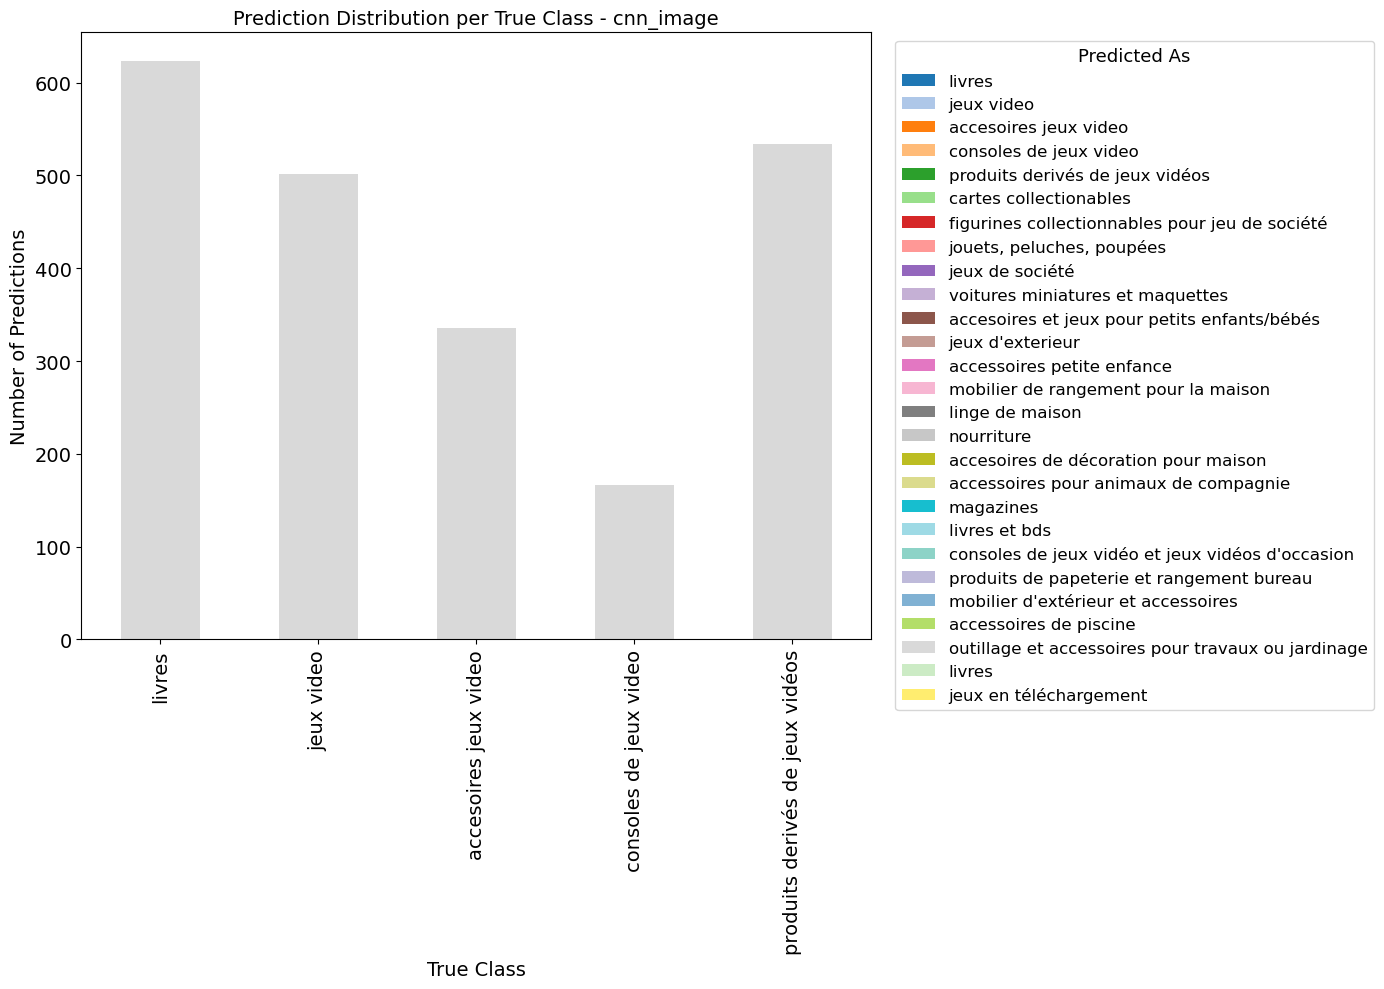

Now processing: ..\models\late_fusion_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


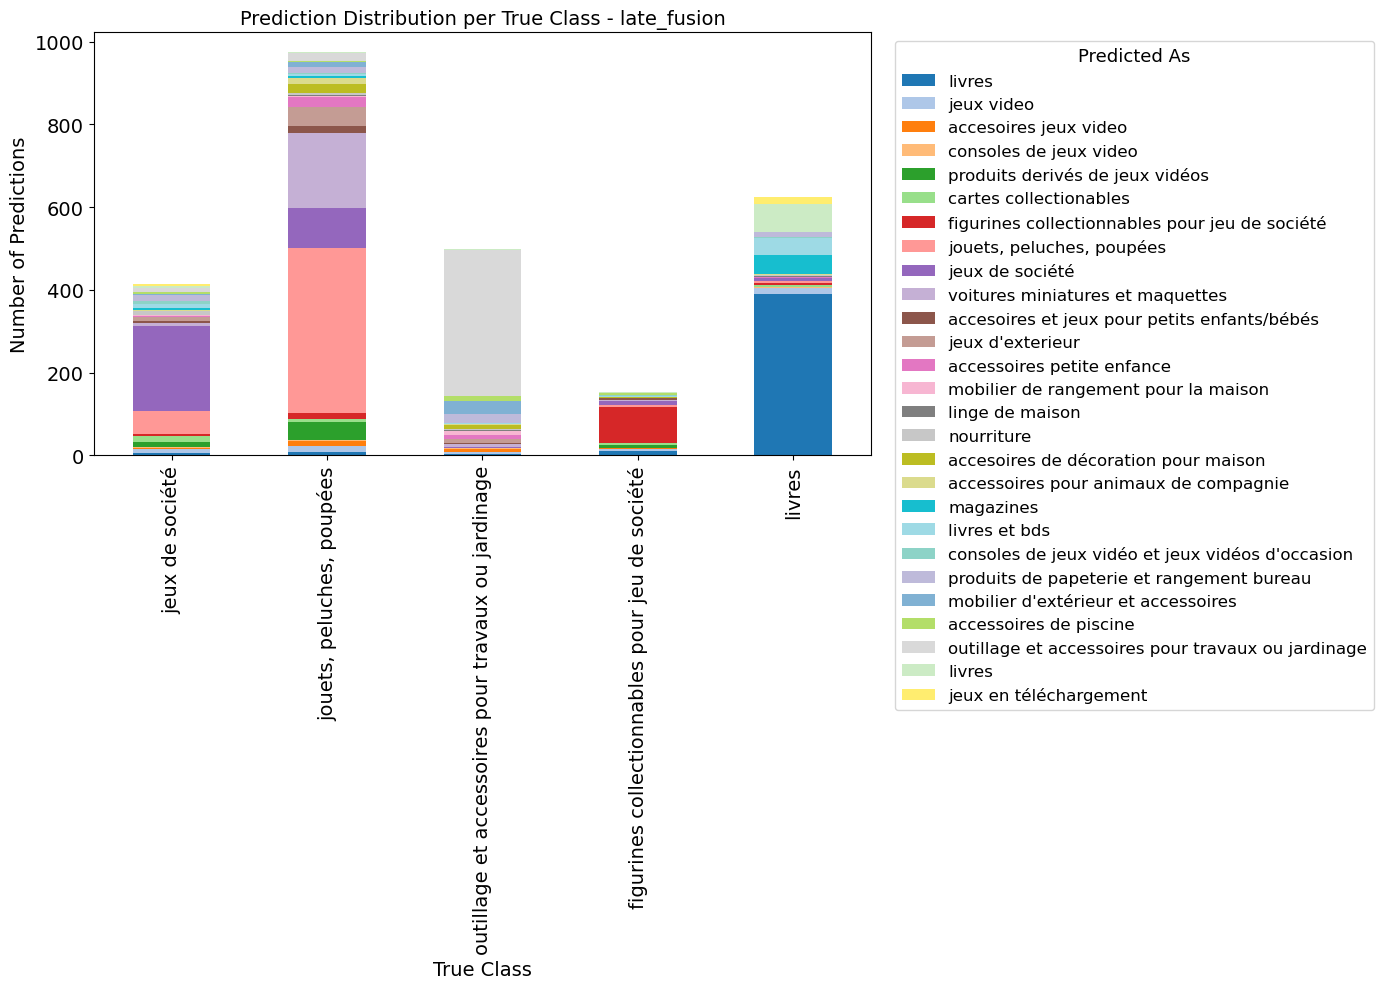

Now processing: ..\models\logistic_regression_image_confusion_matrix.txt
Skipping logistic_regression_image_confusion_matrix.txt
Now processing: ..\models\logistic_regression_text_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


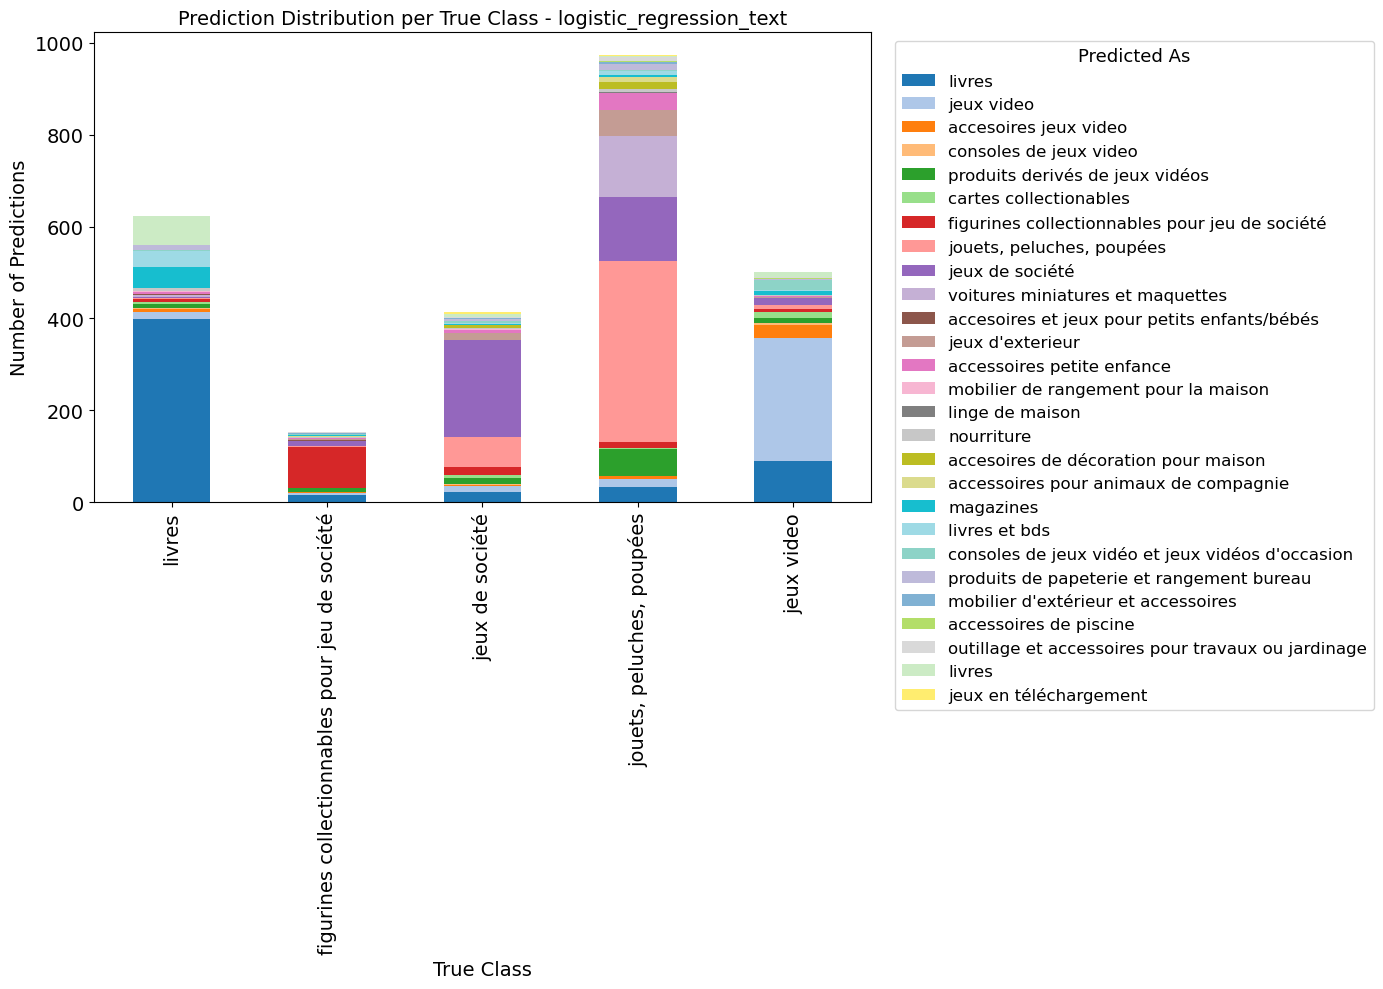

Now processing: ..\models\logistic_regression_tfidf_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


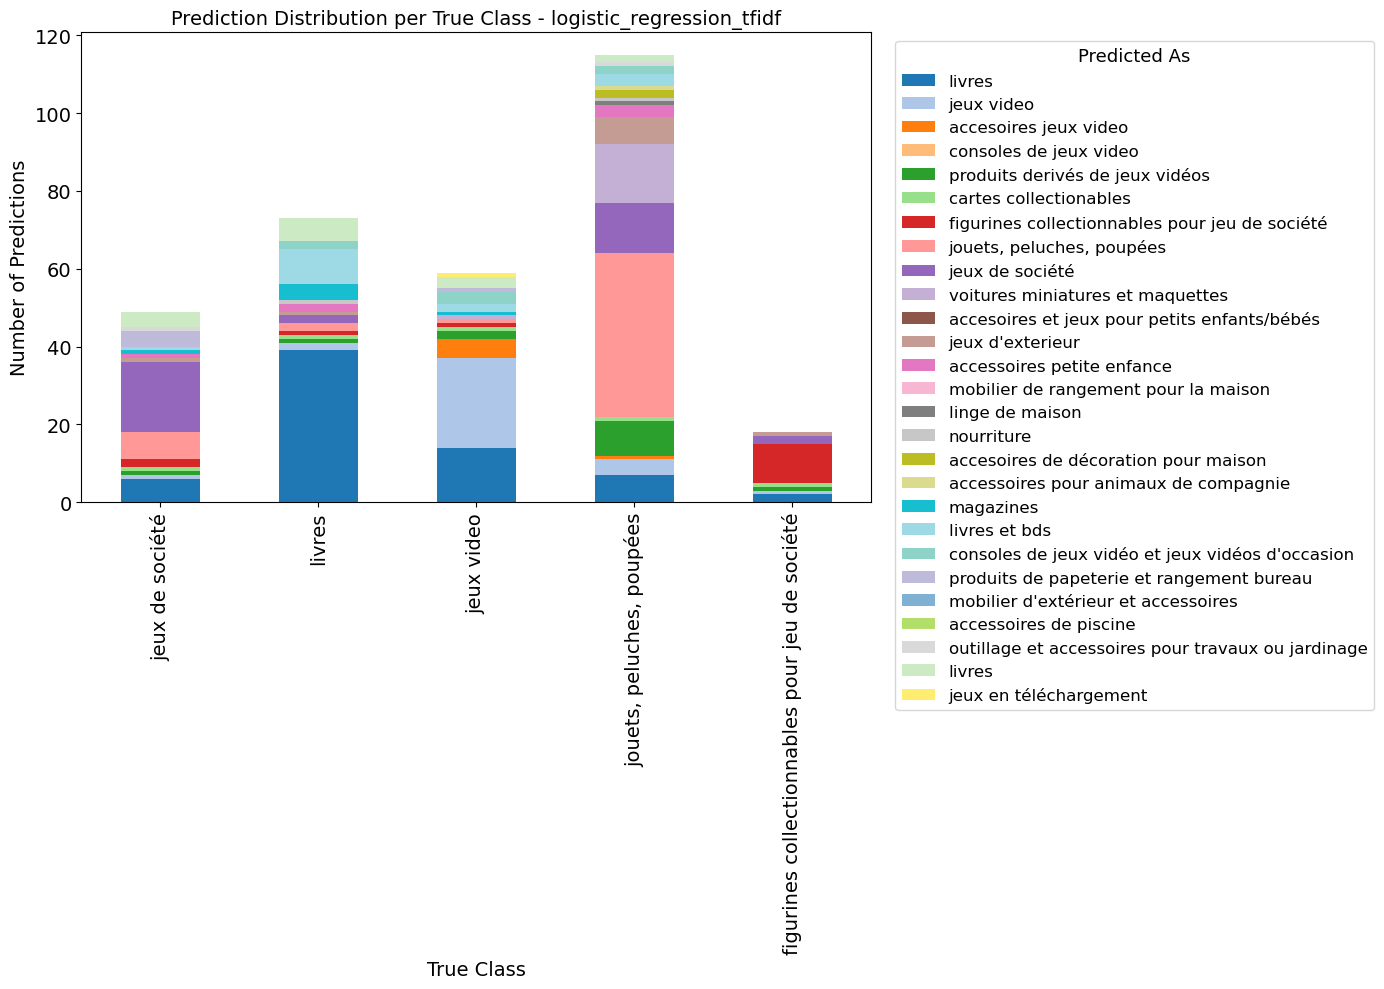

Now processing: ..\models\random_forest_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


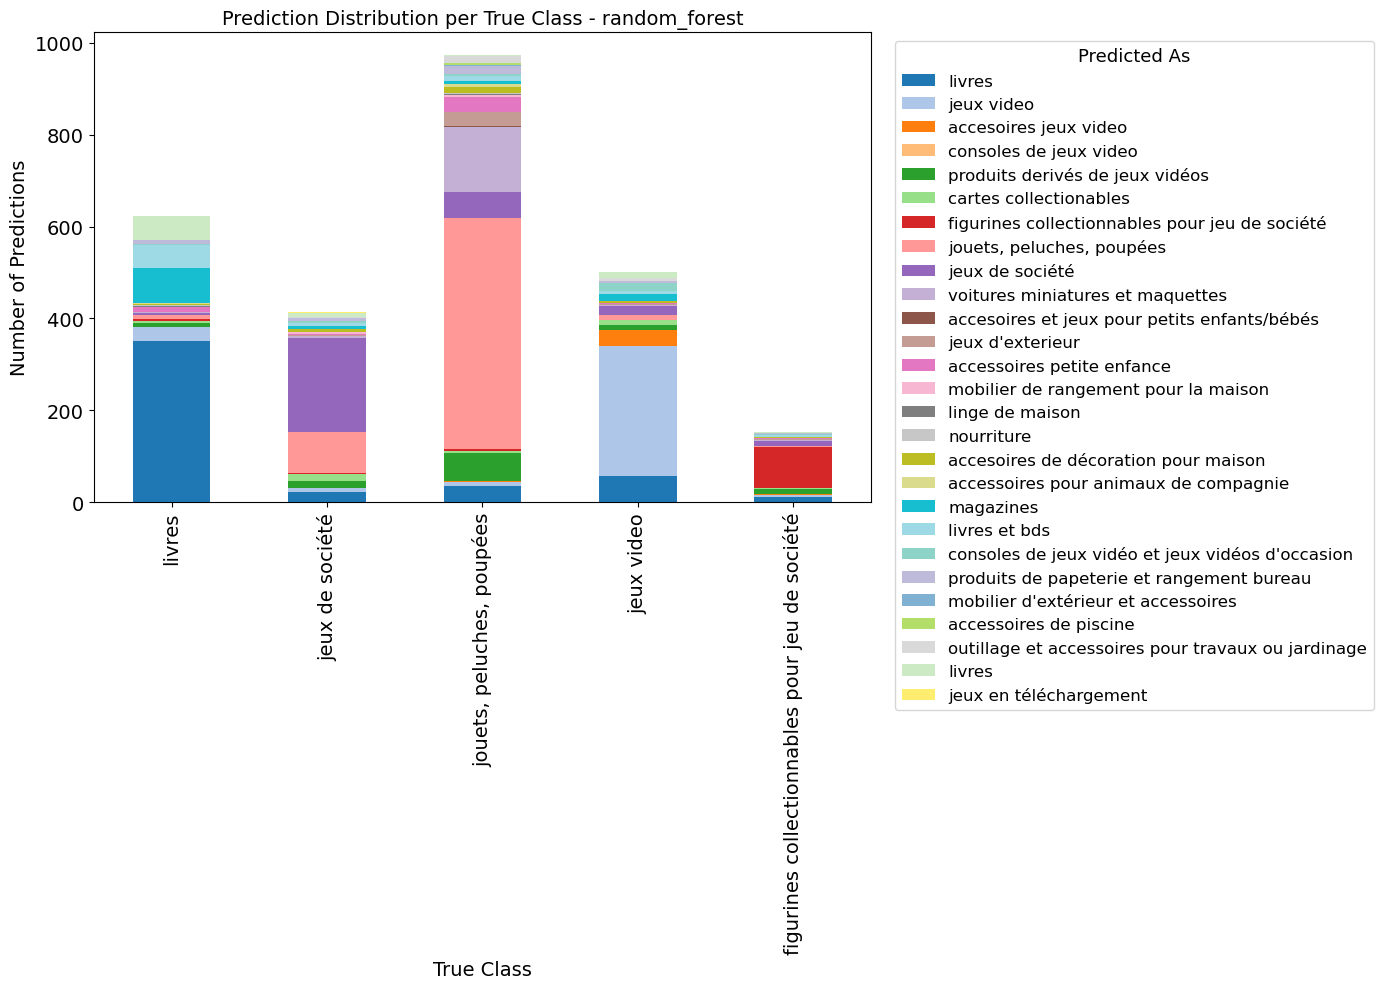

Now processing: ..\models\random_forest_tfidf_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


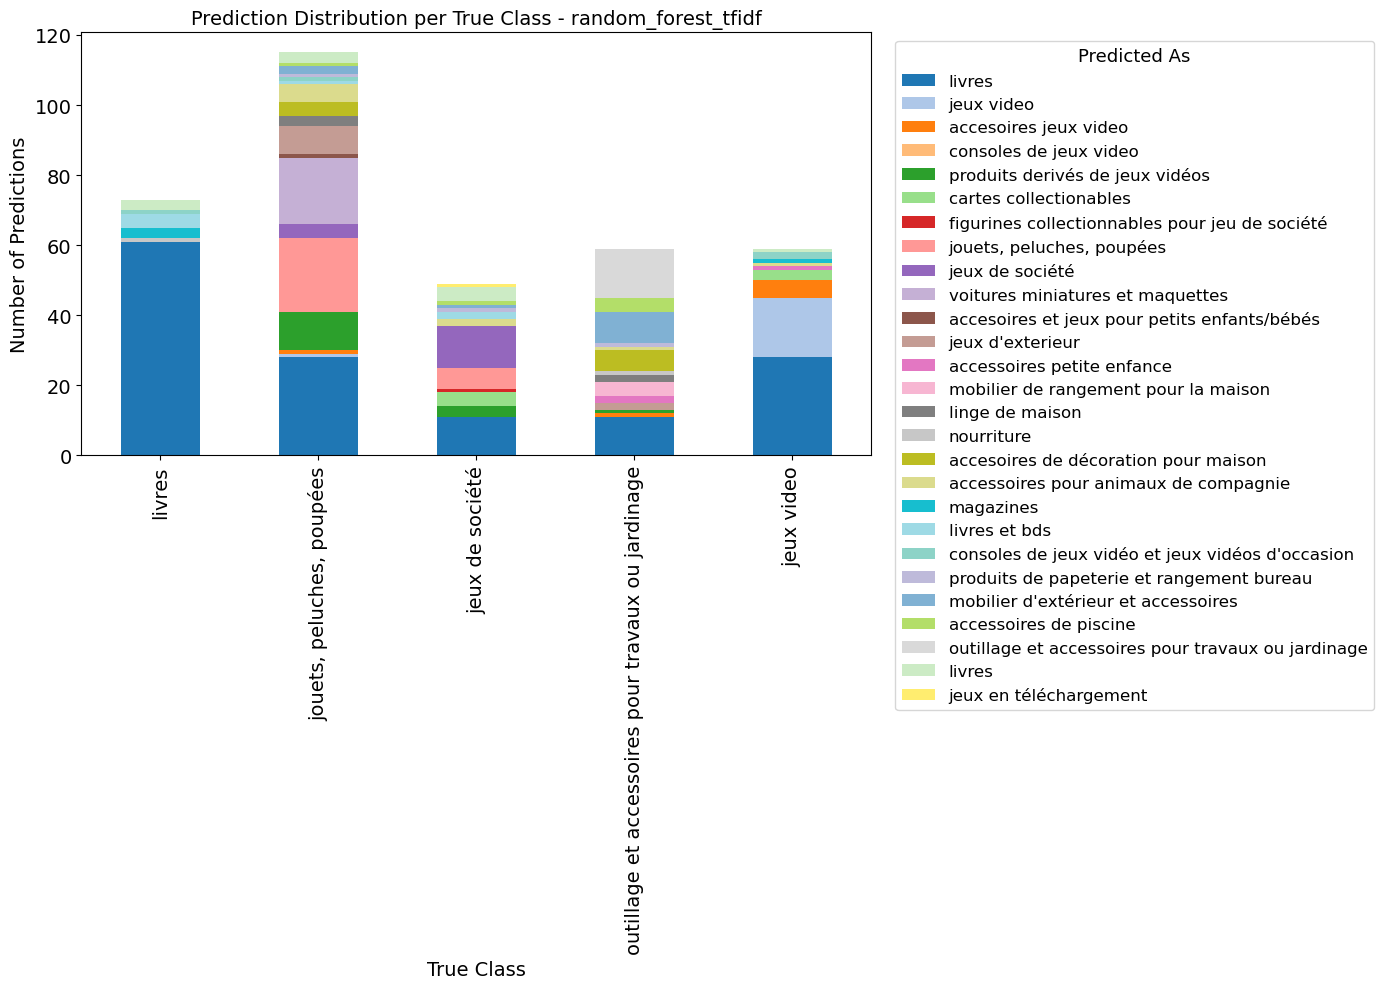

Now processing: ..\models\resnet_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


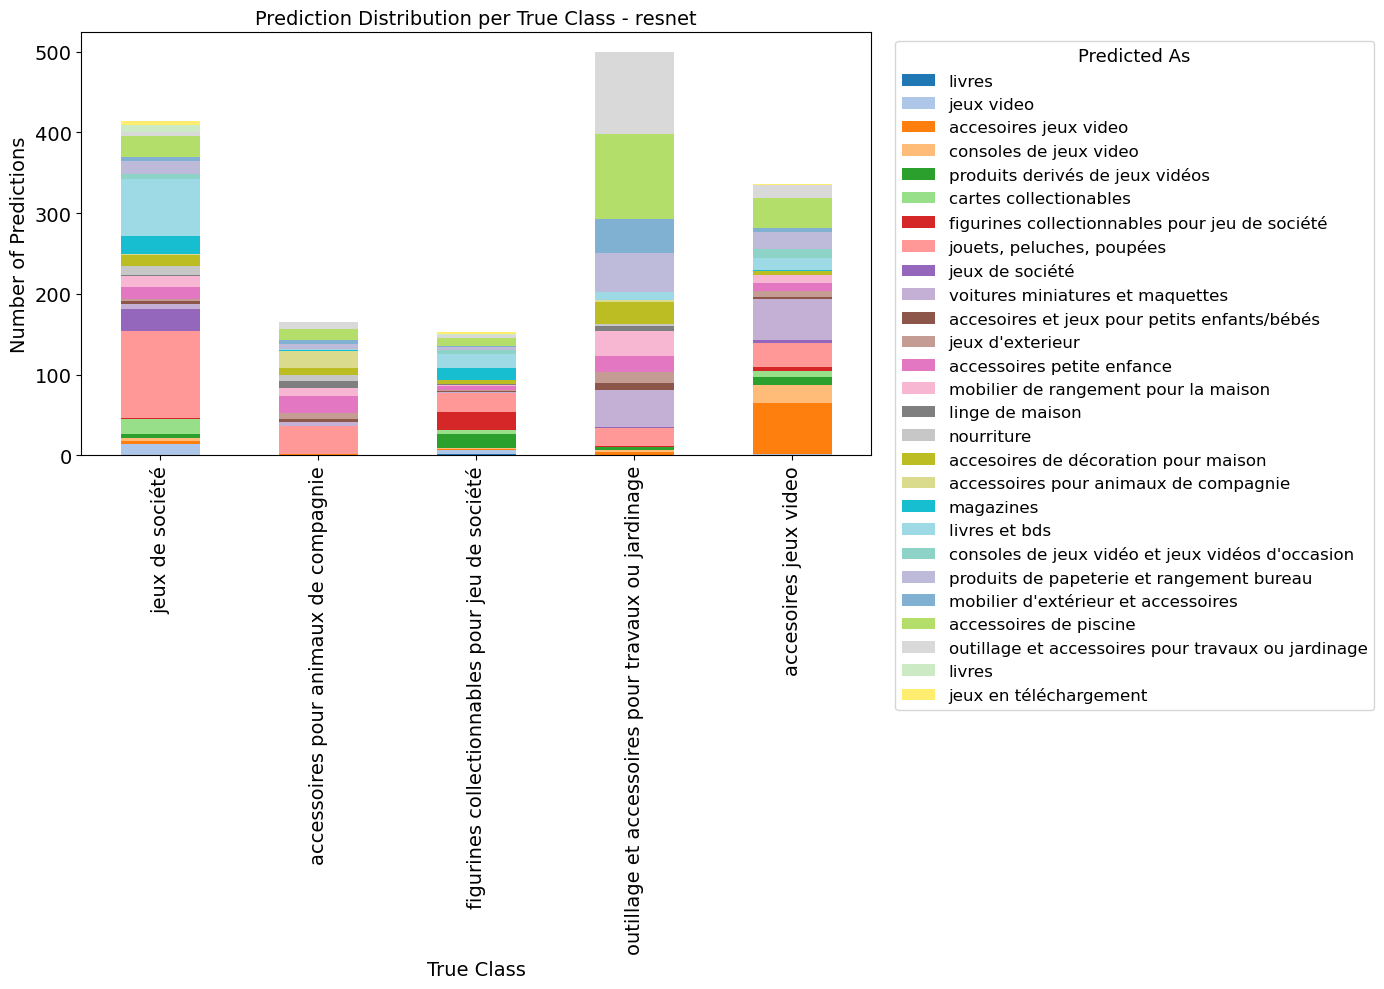

Now processing: ..\models\stacking_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


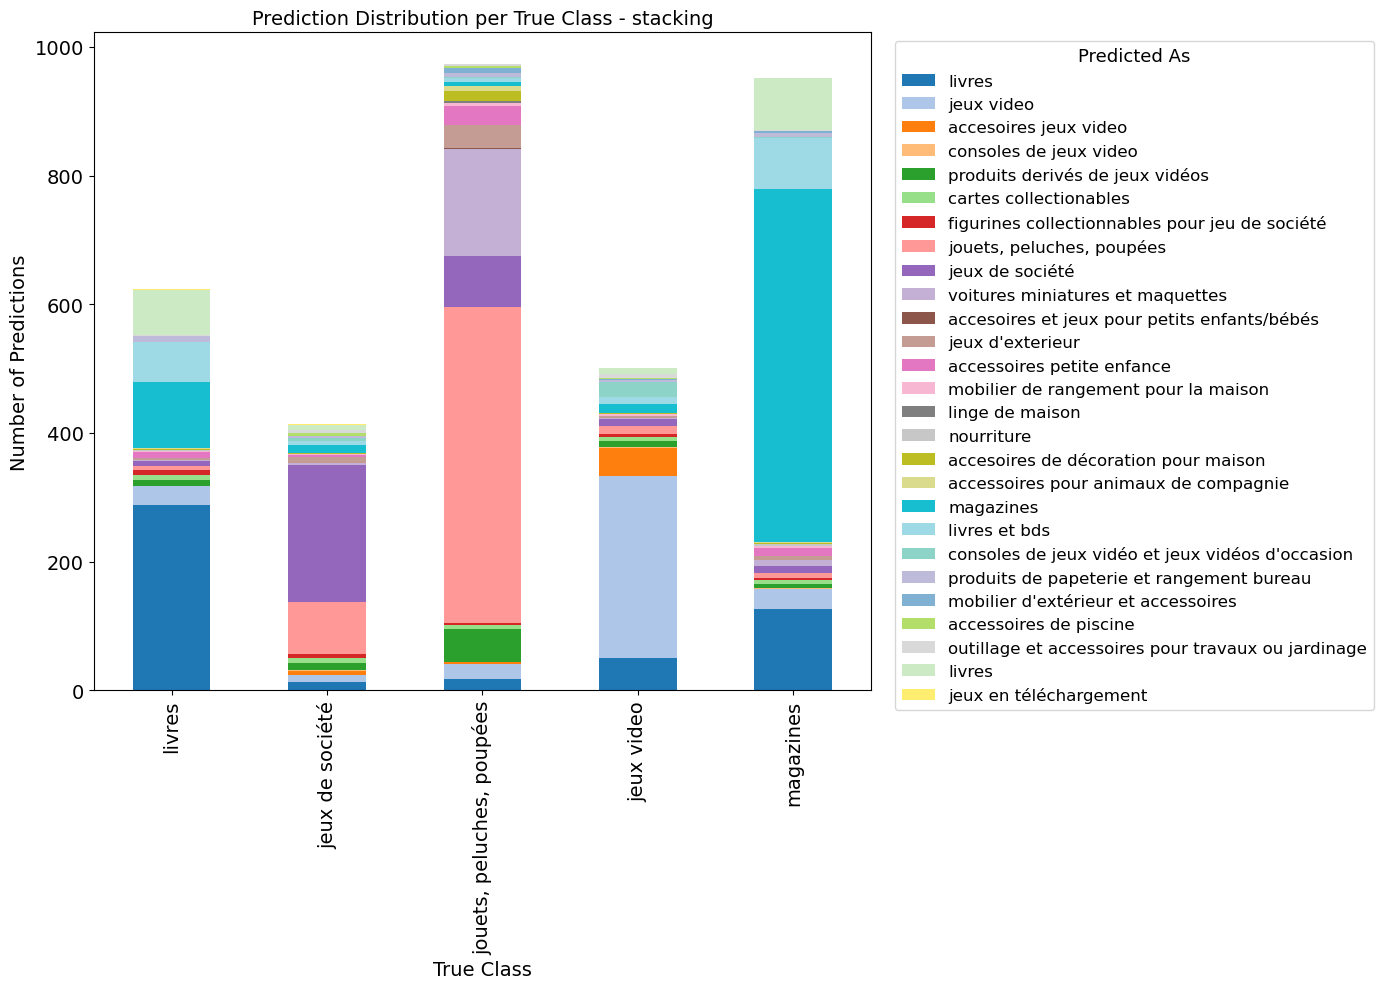

Now processing: ..\models\xgboost_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


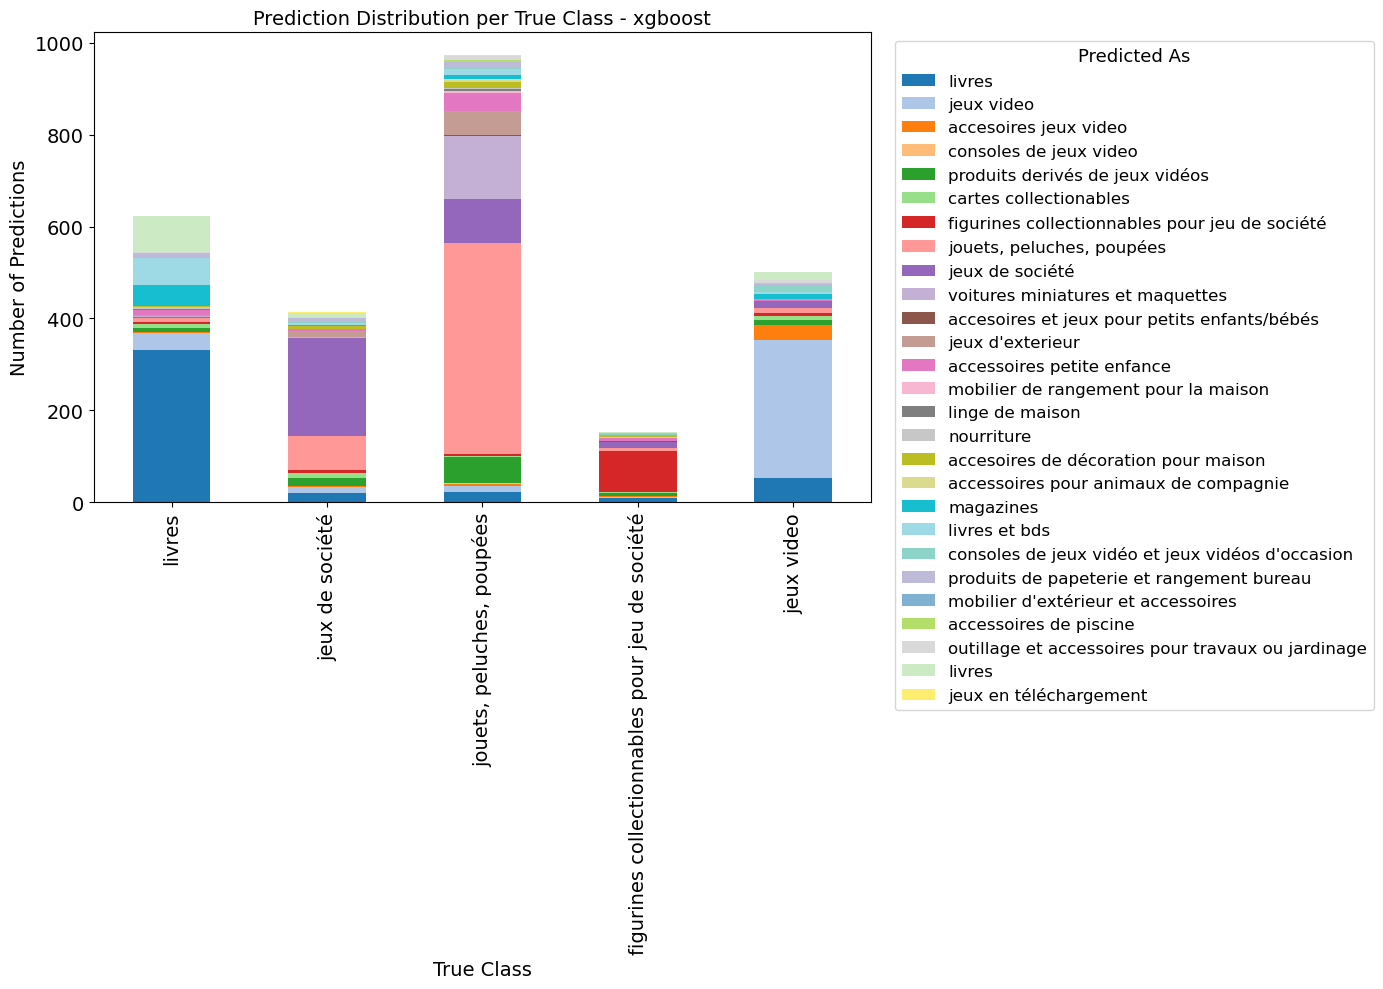

Now processing: ..\models\xgboost_tfidf_confusion_matrix.txt


C:\Users\Cansu\AppData\Local\Temp\ipykernel_2152\3681171361.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')


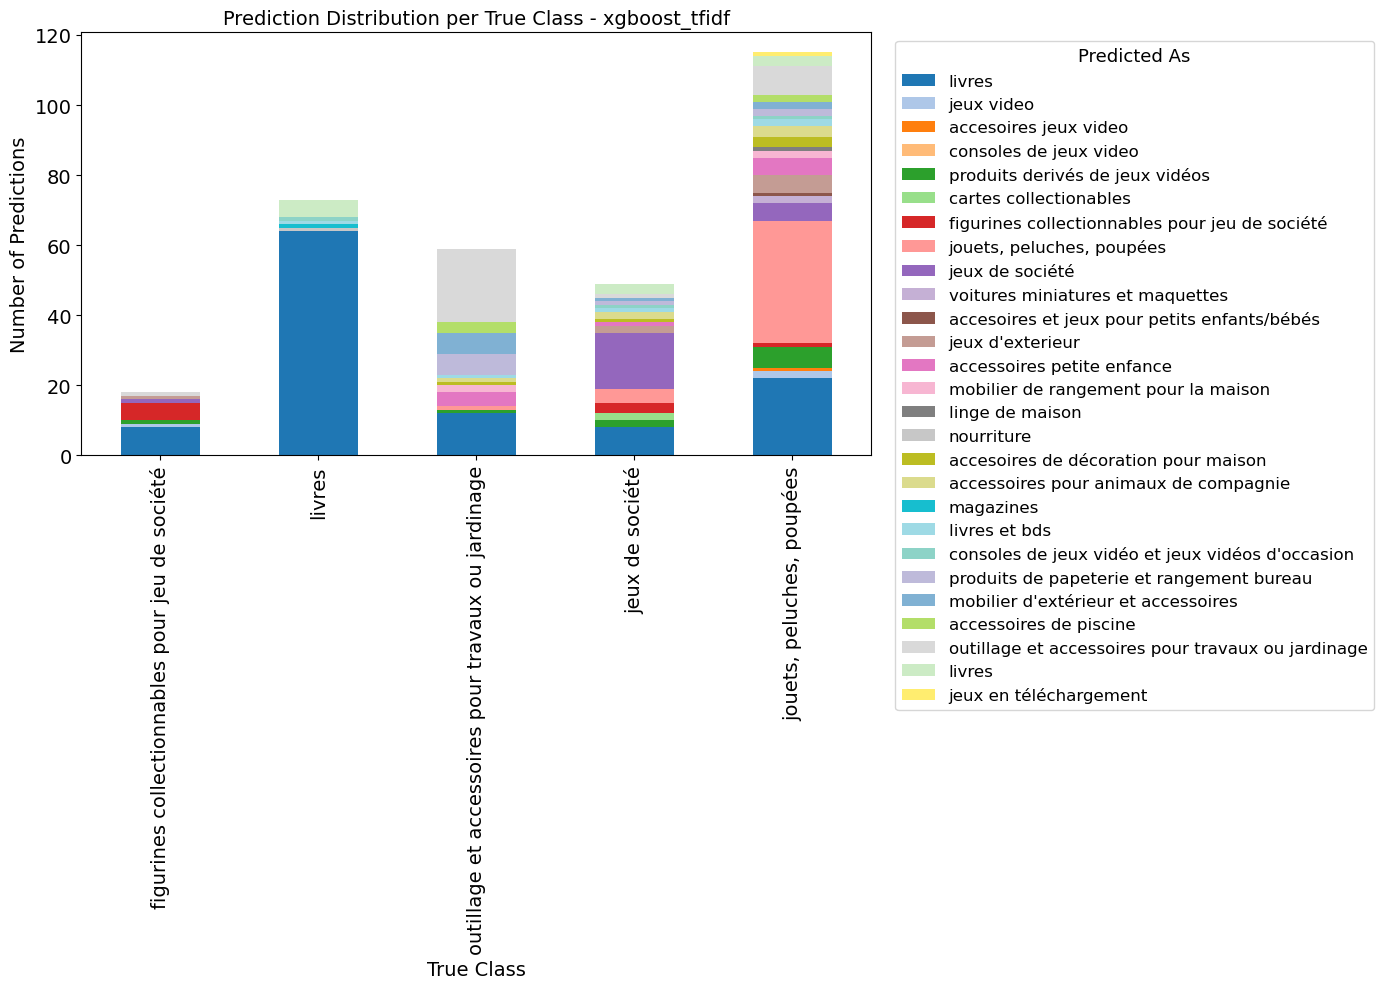

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path

# Chemin vers le dossier contenant les fichiers
folder_path = Path('../models')

# Chercher tous les fichiers *_confusion_matrix.txt
files = list(folder_path.glob('*_confusion_matrix.txt'))

# Fichier ignoré : absence des numéros de classes provoquant une erreur
skip_files = ['logistic_regression_image_confusion_matrix.txt']

# Charger les vrais labels au format dataframe
labels_code = pd.read_csv('../data/prdtypecode_labels.csv')['prdtypecode'].astype(str)
labels = pd.read_csv('../data/prdtypecode_labels.csv', index_col='prdtypecode').astype(str)

# Color list pour bar graph
colors = (
    plt.cm.tab20(np.linspace(0, 1, 20)).tolist() +
    plt.cm.Set3(np.linspace(0, 1, 7)).tolist()
)

for file in files:
    print("Now processing:", file)
    
    if file.name in skip_files:
        print(f"Skipping {file.name}")
        continue
        
    model_name = file.stem.replace('_confusion_matrix', '')

    with open(file, 'r') as f:
        content = f.read()

    # Nettoyer le texte : enlever crochets et retours à la ligne
    content = content.replace('\n', ' ').replace('[', '').replace(']', '')

    # Convertir en liste d'entiers
    numbers = [int(x) for x in content.split() if x.strip() != '']

    # Détecter la taille de la matrice (nombre de lignes = racine carrée du nombre total)
    # Si ce n'est pas carré, on peut essayer de reconstruire selon les lignes originales
    # Ici on suppose que la matrice est carrée
    size = int(np.sqrt(len(numbers)))
    matrix = np.array(numbers).reshape(size, size)

    # Convertir matrix en dataframe avec les labels
    df_cm = pd.DataFrame(matrix, index=labels_code, columns=labels_code)

    # Lire le fichier classification report pour determiner les 5 classes ayant les pires scores f1 
    new_file = str(file).replace('confusion_matrix', 'classification_report')
    class_rep = pd.read_csv('../models/' + new_file, delim_whitespace=True, on_bad_lines='skip')

    # Determiner les 5 classes ayant les pires scores f1 et selectionner ces classes
    smallest_5 = class_rep.nsmallest(5, 'f1-score')
    idx = smallest_5.index.astype(str)
    df_subset = df_cm.loc[idx.intersection(df_cm.index)]
    
    # Plot stacked bar plot
    df_subset.plot(kind='bar', stacked=True, figsize=(14, 10), color=colors[:27]) 
    plt.title(f"Prediction Distribution per True Class - {model_name}", fontsize=14)
    plt.xlabel("True Class", fontsize=14)
    plt.ylabel("Number of Predictions", fontsize=14)
    plt.legend(labels['prdtypecode_label'], fontsize=12, title="Predicted As", title_fontsize=13, loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.xticks(rotation=90, fontsize=14, ticks=range(5), labels = labels.loc[idx.astype(int).intersection(labels.index)]['prdtypecode_label'])
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()
    